# Forecasting Monthly Average Reatil Price of Steak in Canada

#### Loading Libraries

In [1]:
# Numerical Computing
import numpy as np
# Data Manipulation
import pandas as pd
from pandas.tseries.offsets import MonthEnd
# Data Visualization
import matplotlib.pyplot as plt

# Time Series Forecasting
from prophet import Prophet
# Metrics
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
# Plots
from prophet.plot import plot_cross_validation_metric
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_yearly, plot_weekly
from prophet.plot import add_changepoints_to_plot

# Warnings
import warnings

# TQDM Notebook
from tqdm.notebook import tqdm

# Itertools
from itertools import product
from typing import Union

# Machine Learning Metrics
from sklearn.metrics import mean_absolute_error

# Statsmodels
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [2]:
warnings.filterwarnings('ignore')

##### Visualization Set Up

In [3]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = True

#### Loading Data

In [4]:
df = pd.read_csv('/Users/isisromero/desktop/time_series/data/monthly_avg_retail_price_food_canada.csv')

df.head()

,REF_DATE,GEO,DGUID,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1995-01,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.17,NaN,NaN,NaN,2
1,1995-02,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.29,NaN,NaN,NaN,2
2,1995-03,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.12,NaN,NaN,NaN,2
3,1995-04,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.38,NaN,NaN,NaN,2
4,1995-05,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.00,NaN,NaN,NaN,2


In [5]:
df.shape

(16166, 15)

In [6]:
df = df[df['Products'] == 'Round steak, 1 kilogram']
df.head()

,REF_DATE,GEO,DGUID,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1995-01,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.17,NaN,NaN,NaN,2
1,1995-02,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.29,NaN,NaN,NaN,2
2,1995-03,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.12,NaN,NaN,NaN,2
3,1995-04,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.38,NaN,NaN,NaN,2
4,1995-05,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.00,NaN,NaN,NaN,2


In [7]:
df.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Products', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [8]:
cols_to_drop = ['GEO', 'DGUID', 'Products', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS']

df = df.drop(cols_to_drop, axis=1)
df.head()

,REF_DATE,VALUE
0,1995-01,10.17
1,1995-02,10.29
2,1995-03,10.12
3,1995-04,10.38
4,1995-05,10.00


In [9]:
df.shape

(323, 2)

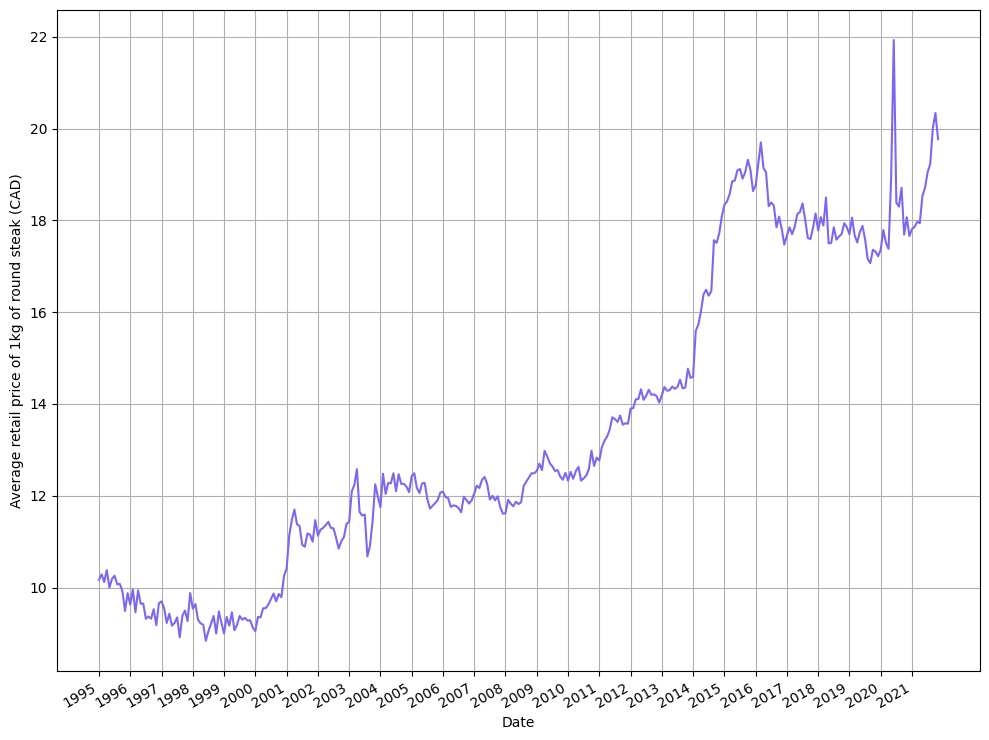

In [10]:
fig, ax = plt.subplots()

ax.plot(df['VALUE'], color='mediumslateblue')
ax.set_xlabel('Date')
ax.set_ylabel('Average retail price of 1kg of round steak (CAD)')

plt.xticks(np.arange(0, 322, 12), np.arange(1995, 2022, 1))

fig.autofmt_xdate()
plt.tight_layout()